## Neral Networks In Pytorch
* We're just going to use data from Pytorch's "torchvision." Pytorch has a relatively handy inclusion of a bunch of different datasets, including many for vision tasks, which is what torchvision is for.
> Let's visualise the datatets that we can find in `torchvision`

## Imports

In [52]:
import torch
import torchvision
from torchvision import datasets, transforms
from matplotlib import pyplot as plt
import numpy as np

> The datasets `dir`

In [6]:
print(dir(datasets)), len(dir(datasets))

['CIFAR10', 'CIFAR100', 'Caltech101', 'Caltech256', 'CelebA', 'Cityscapes', 'CocoCaptions', 'CocoDetection', 'DatasetFolder', 'EMNIST', 'FakeData', 'FashionMNIST', 'Flickr30k', 'Flickr8k', 'HMDB51', 'ImageFolder', 'ImageNet', 'KMNIST', 'Kinetics400', 'LSUN', 'LSUNClass', 'MNIST', 'Omniglot', 'PhotoTour', 'Places365', 'QMNIST', 'SBDataset', 'SBU', 'SEMEION', 'STL10', 'SVHN', 'UCF101', 'USPS', 'VOCDetection', 'VOCSegmentation', 'VisionDataset', 'WIDERFace', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'caltech', 'celeba', 'cifar', 'cityscapes', 'coco', 'fakedata', 'flickr', 'folder', 'hmdb51', 'imagenet', 'kinetics', 'lsun', 'mnist', 'omniglot', 'phototour', 'places365', 'sbd', 'sbu', 'semeion', 'stl10', 'svhn', 'ucf101', 'usps', 'utils', 'video_utils', 'vision', 'voc', 'widerface']


(None, 75)

> We have `75` items that we can work with in the torchvision dataset.

### The MNIST dataset

The goal is to classify hand-written digits that comes from the `mnist` dataset as our `hello-world-neural-network`. This dataset contains images of handwritten digits from `0` to `9`

### Loading the data

In [14]:
train = datasets.MNIST('', train=True, download=True,
                      transform = transforms.Compose({
                          transforms.ToTensor()
                      }))
test = datasets.MNIST('', train=False, download=True,
                      transform = transforms.Compose({
                          transforms.ToTensor()
                      }))

> From the above cell we are just downloading the datasets and then transform or preprocess it.

> Now, we need to handle for how we're going to iterate over that dataset:

In [34]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

> **That was so brutal!! What is happening here?**

**shuffle** - in ML normally we shuffle the data to mix it up so that the data will not have labels of the same type following each other.
**batch_size** - this split our data in batches in our case a batch of `10` 

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]]) tensor([7, 7])


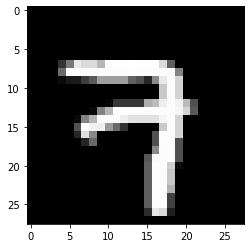

In [33]:

for data in trainset:
    print(data[0][:2], data[1][:2])
    plt.imshow(data[0][0].view(28, 28), cmap="gray")
    plt.show()
    break

### Creating a NN
* Now we have our trainset and testset let's start creating a Neural Network.

In [35]:
import torch.nn as nn
import torch.nn.functional as F

> The `torch.nn` import gives us access to some helpful neural network things, such as various neural network layer types like:
 **regular fully-connected layers**, **convolutional layers** ..etc
 
> The `torch.nn.functional` area specifically gives us access to some handy functions that we might not want to write ourselves. We will be using the **`relu`** or "rectified linear unit" activation function for our neurons.

In [36]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

net = Net()
print(net)

Net()


> We have created a `Net` class which is inheriting from the `nn.Module` class.

In [39]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.FC1 = nn.Linear(28*28, 64)
        self.FC2 = nn.Linear(64, 64 )
        self.FC3 = nn.Linear(64, 64)
        self.FC4 = nn.Linear(64, 10)

net = Net()
print(net)

Net(
  (FC1): Linear(in_features=784, out_features=64, bias=True)
  (FC2): Linear(in_features=64, out_features=64, bias=True)
  (FC3): Linear(in_features=64, out_features=64, bias=True)
  (FC4): Linear(in_features=64, out_features=10, bias=True)
)


> Each of our `nn.Linear` layers expects the first parameter to be the input size, and the 2nd parameter is the output size. Note that the basic `Nural Network` expect a flattened array not a `28x28`. So at some point we must pass the flattened array.

> The last layer **accepts 64 in_features and outputs 10** which is in our case the total number of unique labels.`

> Let's define a new method called `forward`

In [40]:
class Net(nn.Module):
    def __init__(self):
        super().__init__();
        self.FC1 = nn.Linear(28 * 28, 64)
        self.FC2 = nn.Linear(64, 64)
        self.FC3 = nn.Linear(64, 64)
        self.FC4 = nn.Linear(64, 10)
    
    def forward(self, X):
        X = self.FC1(X)
        X = self.FC2(X)
        X = self.FC3(X)
        X = self.FC4(X)
        return X
Net()

Net(
  (FC1): Linear(in_features=784, out_features=64, bias=True)
  (FC2): Linear(in_features=64, out_features=64, bias=True)
  (FC3): Linear(in_features=64, out_features=64, bias=True)
  (FC4): Linear(in_features=64, out_features=10, bias=True)
)

> So `X` in this case is our input data, we will pass this to the first `FC1` and the output will be passed down to the `FC2` up to the `FC4` **And also remember that our `X` is a flattened array.**
**Wait** Our layers are missing activation functions. In this case we are going to use `relu` as our activation function for  other layers and `log_softmax` for the output layer.

In [56]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.FC1 = nn.Linear(28 * 28, 64)
        self.FC2 = nn.Linear(64, 64)
        self.FC3 = nn.Linear(64, 64)
        self.FC4 = nn.Linear(64, 10)
    
    def forward(self, X):
        X = F.relu(self.FC1(X))
        X = F.relu(self.FC2(X))
        X = F.relu(self.FC3(X))
        X = F.log_softmax(self.FC4(X), dim=1)
        return X
    N

X = torch.randn((28,28))

X = X.view(-1, 28*28)
net = Net()
np.argmax(net(X).detach().numpy())

8

### Training Our NN

In [57]:
net.parameters()

<generator object Module.parameters at 0x00000192D053A190>

In [60]:
from torch import optim
optimizer = optim.Adam(net.parameters(), lr=1e-3)

**loss** - this function calcualetes how far are our classifiaction from reality.
**For one hot vectors** - `mean_square_error` is better to use.
**For scalar classifictaion** - `cross_entropy` is better to use.

> [Loss Functions](https://pytorch.org/docs/stable/nn.html#loss-functions)

**optimizer** - this is what adjust the model's adjustable parameters like weights. The one that is popular is `Adam` (**Adaptive Momentum**) which takes a `lr` which has a default value of `0.001 or 1e-3`. The learning rate dictates the magnitude of changes that the optimizer can make at a time

> Now we can iterate over the data and see more about the **loss** we are going to define our `EPOCHS`
too many epochs can result in the model `over-fitting` and too few epochs may result in the model `under-learning` the data.

In [62]:
EPOCHS = 3
for epoch in range(EPOCHS):
    print(f"EPOCHS {epoch+1}/{EPOCHS }")
    for data in trainset:
        X, y = data # a batch of 10 features and 10 labels
        net.zero_grad() # sets gradients to 0 before loss calulated
        output = net(X.view(-1,784)) ## pass the flattened image
        
        ## calculate the loss value
        loss = F.nll_loss(output, y)
        # apply this loss backwards thru the network's parameters
        loss.backward() 
        # attempt to optimize weights to account for loss/gradients
        optimizer.step()
    print(loss)

EPOCHS 1/3
tensor(0.0112, grad_fn=<NllLossBackward>)
EPOCHS 2/3
tensor(0.2175, grad_fn=<NllLossBackward>)
EPOCHS 3/3
tensor(0.2117, grad_fn=<NllLossBackward>)


The `net.zero_grad()` is a very important step, otherwise these gradients will add up for every pass, and then we'll be re-optimizing for previous gradients that we already optimized for.

### Calculating accuracy

In [63]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 784))
        
        for i, j in enumerate(output):
            if torch.argmax(j) == y[i]:
                correct +=1
            total += 1
print("Accuracy: ", correct/total)

Accuracy:  0.971


> Our model is `97%` accurate on the `testset`

In [65]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        
        for i, j in enumerate(output):
            if torch.argmax(j) == y[i]:
                correct +=1
            total += 1
print("Accuracy: ", correct/total)

Accuracy:  0.9787666666666667


> Our model is `98%` accurate on the trainset. Which is closer to `97%` which means we are not overfitting or underfitting the model. Our model is learning fine with `3` epochs.

### Making Predictions

In [72]:
for X in trainset:
    X, y = X
    break

(<matplotlib.image.AxesImage at 0x192d04a7eb0>, tensor(3))

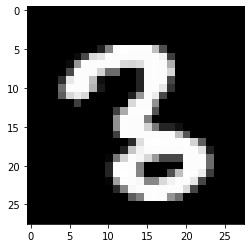

In [75]:
plt.imshow(X[0].view(28,28), cmap="gray"), y[0]

In [78]:
predictions  = net(X[0].view(-1, 28*28))
torch.argmax(predictions).detach().numpy()

array(3, dtype=int64)

> The model is cool in predicting the digit `3`.